# 4. Logistische Regression 
## 4.1 Klassifikation 0 oder 1

### Probleme bei Anwendung von Linearer Regression in Datensätzen mit 0 oder 1 Einträgen
- Die diskrete Ausgabemodalität (Klasse 0 oder 1) wird nicht eingehalten, da nicht nur die Ausgabewerte 0 und 1 sondern alle Werte im Intervall (z.B.[−0.00139646, 1.40044273]) angenommen werden.
- Eventuell könnte man den Wert f (x ) als Wahrscheinlichkeit interpretieren, dass ein Kunde kreditwürdig ist. Aber auch dann machen die extremen Werte wie f (0) = −0.00139646 < 0 oder f (8000) = 1.40044273 > 1 keinen Sinn.

**Die Idee der Logistischen Regression ist es, die Idee der Schätzung der Wahrscheinlichkeit der Klassenzugehörigkeit aufzugreifen und den Wertebereich von f mit Hilfe der logistischen Funktion:**

$logistic(x)= \frac{e^x}{1+e^x}$ 

**unter Kontrolle zu bekommen.**





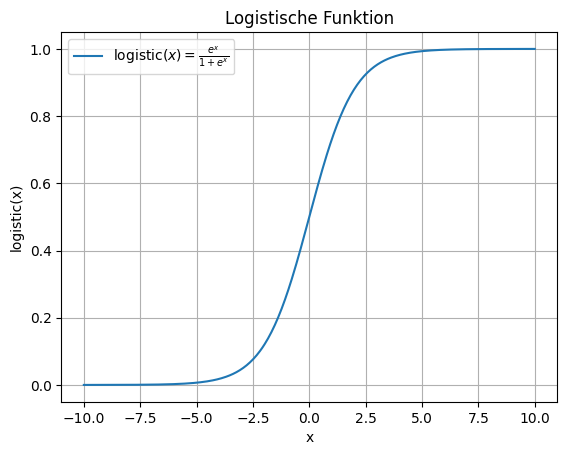

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the logistic function
def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

# Generate values for x
x = np.linspace(-10, 10, 400)

# Compute the logistic function for each value of x
y = logistic(x)

# Create the plot
plt.plot(x, y, label=r'logistic$(x) = \frac{e^x}{1 + e^x}$')
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.title('Logistische Funktion')
plt.legend()
plt.grid(True)
plt.show()

## Kombination der Linearen Regression
### $x$ in $f(x)$ steht für die lineare Regression


$
p(x) = \text{logistic}(f(x)) = \frac{e^{(w_1 x + w_0)}}{1 + e^{(w_1 x + w_0)}}
$

Offensichtlich ist nun $ p(x) \in (0,1) $ für alle $ x \in \mathbb{R} $.
### Interpretation
Wir interpretieren $p(x)$ als die Wahrscheinlichkeit, dass $x$ zur Klasse 1 gehört, also

$$p(x) = \Pr(y = 1 \mid X = x).$$

Demnach gehört $x$ zu Klasse 0 mit Wahrscheinlichkeit $1 - p(x)$, also

$$\Pr(y = 0 \mid X = x) = 1 - \Pr(y = 1 \mid X = x) = 1 - p(x).$$

In der logistischen Regression wird die logistische Funktion verwendet, um die Wahrscheinlichkeit eines bestimmten Ereignisses vorherzusagen. Die logistische Funktion wird definiert als:

$$\text{logistic}(x) = \frac{e^x}{1 + e^x}.$$

In der eindimensionalen logistischen Regression wird $x$ durch eine lineare Kombination der Eingangsvariablen ersetzt. Das Modell kann als folgt beschrieben werden:

$$p(x) = \text{logistic}(f(x)) = \frac{1}{1 + e^{(w_1 x + w_0)}}.$$

Offensichtlich ist nun $p(x) \in (0,1)$ für alle $x \in \mathbb{R}$.

Hierbei ist:
- $p(x)$ die Wahrscheinlichkeit, dass das Ereignis eintritt, gegeben die Eingangsvariable $x$.
- $w_0$ der Interzept (Achsenabschnitt).
- $w_1$ der Koeffizient der Eingangsvariablen $x$.

Die logistische Regression zielt darauf ab, die Koeffizienten $w_0$ und $w_1$ so zu bestimmen, dass die logistische Funktion die Wahrscheinlichkeiten der Beobachtungen am besten beschreibt.

## 4.2 Maximum Likelihood

Während wir bei der linearen Regression beim **Training zur Bestimmung der Parameter** den Fehler (RSS,MSE) minimiert haben, werden wir bei der logistischen Regression die Maximum **Likelihood Methodik** (zu deutsch etwa 'Maximale Mutmayßlichkeit') verwenden.

**Beispiel**:Wir betrachten eine (möglicherweise unfaire) Münze, welche mit unbekannter WK w ∈ [0, 1] Kopf zeigt und mit WK 1 − w Zahl. Wir werfen die Münze n mal und erhalten k mal Kopf (und n − k mal Zahl). Wie groß ist w?

Das Grundprinzip von Maximum Likelihood (ML) ist, dass wir die Parameter eines Modells so bestimmen, dass die Plausibilität, dass das Modell die beobachteten Daten generiert, maximiert wird. Im Beispiel des n-maligen Münzwurfs ist die Likelihood einer bestimmten Sequenz, die genau k mal Kopf enthält in Abhängigkeit des Parameters w:

$L(w) = w^k (1-w)^{n-k}$

Der Term L(w) wird Likelihood genannt. Formal suchen wir also bei ML: $\text{arg max } L(w)$ mit $w=0,1$


Auch bei ML bilden wir meist die Ableitung, um das Optimum zu nden.

$
\frac{\partial L(w)}{\partial w} = \frac{\partial}{{\partial w}} w^k (1 - w)^{n - k} 
$

$
 \frac{\partial L(w)}{\partial w} = 0 \Leftrightarrow w = 0 \vee w = 1 \vee w = \frac{k}{n}
$

da die Ableitung Null wird, wenn einer der drei Faktoren Null ist; und es gilt $k − nw = 0 $ wenn $w = \frac{k}{n}$ .


Zur Bestimmung des Maximums überprüfen wir

\begin{align*}
w = 0: \quad & L(0) = 0^k (1 - 0)^{n - k} = 0 \\
w = 1: \quad & L(1) = 1^k (1 - 1)^{n - k} = 0 \\
w = k: \quad & L(k) = k^k (1 - k)^{n - k} > 0 \quad (\text{falls} \, k > 0 \, \text{und} \, k \neq n)
\end{align*}

und erhalten somit die Maximum-Likelihood-Schätzung

$
w = \frac{k}{n}, \, \text{welche auch der Intuition entspricht}.
$

Hiervon das Maximum mit Hilfe der Ableitung zu berechnen, ist
mühselig. Stattdessen können wir auch das Minimum des negativen Logarithmus suchen, gegeben durch

$$
- \log L(w) = - \sum_{i \, | \, y(i) = 1} \log p(x^{(i)}) - \sum_{i \, | \, y(i) = 0} \log (1 - p(x^{(i)}))
$$



$$
\frac{\partial}{\partial w_j} (-\log L(w)) = \frac{\partial}{\partial w_j} \left( - \sum_{i \, | \, y(i) = 1} \log p(x^{(i)}) - \sum_{i \, | \, y(i) = 0} \log (1 - p(x^{(i)})) \right)
$$

$$
\frac{\partial}{\partial w_j}p(x) = \frac{e^{w_1+w_0}}{(1+e^{w_1+w_0})^2}


\begin{cases} 
1 & \text{falls } j = 0 \\ 
x & \text{falls } j = 1 
\end{cases}
$$


$$
1 - p(x) = 1 - \frac{e^{w_1 x + w_0}}{1 + e^{w_1 x + w_0}} = \frac{1 + e^{w_1 x + w_0} - e^{w_1 x + w_0}}{1 + e^{w_1 x + w_0}} = \frac{1}{1 + e^{w_1 x + w_0}}
$$




### Zusammenfassend

Die optimalen Parameter findet man mit:

$$
\frac{\partial}{\partial w_0} (- \log L(w)) = - \sum_{i \, | \, y(i) = 1} (1-p(x^{i})) + \sum_{i \, | \, y(i) = 0} p(x^{i})
$$

$$
\frac{\partial}{\partial w_1} (- \log L(w)) = - \sum_{i \, | \, y(i) = 1} (1-p(x^{i}))x^{i} + \sum_{i \, | \, y(i) = 0} p(x^{i})x^{i}
$$

Ab hier kann dann das gewohnte Gradientenabstiegsverfahren verwendet werden, um die optimale Parameterbelegung zu finden.


### Beispiel
Wenn wir diesen Ansatz auf unser Beispiel anwenden, erhalten wir die Parameter

$
w_0 = −1.25238942, w_1 = 0.000542.$

**Kreditbeispiel**: Wahrscheinlichkeit für die Rückzahlung (orange) p(x) bzw. Nicht-Rückzahlung (blau) 1 − p(x).

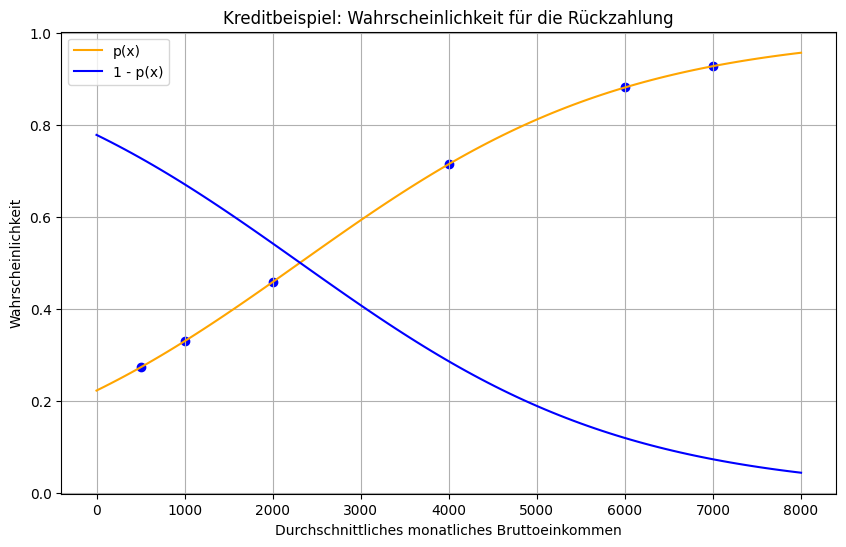

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters from the example
w0 = -1.25238942
w1 = 0.000542

# Generate a range of x values (monthly gross income)
x = np.linspace(0, 8000, 100)

# Define the logistic regression function
def logistic_function(x, w0, w1):
    return 1 / (1 + np.exp(-(w0 + w1 * x)))

# Calculate the probabilities
p_x = logistic_function(x, w0, w1)
one_minus_p_x = 1 - p_x

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, p_x, label='p(x)', color='orange')
plt.plot(x, one_minus_p_x, label='1 - p(x)', color='blue')

# Plot additional points for the dataset example (if any given in the image)
# Assuming some hypothetical points for demonstration
sample_points_x = np.array([500, 1000, 2000, 4000, 6000, 7000])
sample_points_y = logistic_function(sample_points_x, w0, w1)
plt.scatter(sample_points_x, sample_points_y, color='blue')

# Adding labels and title
plt.xlabel('Durchschnittliches monatliches Bruttoeinkommen')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Kreditbeispiel: Wahrscheinlichkeit für die Rückzahlung')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Interpretation des geschätzten Parameter $w_1 = 0.000542$ für die 
Variable $x$ (durchschnittliches Einkommen in Euro):

- $w_1 = 0.000542$: ist positiv, d.h., je höher das durchschnittliche 
Einkommen, umso wahrscheinlicher ist es, dass der Kredit zurückgezahlt wird.
- $exp(w_1 ) = exp(0.000542) = 1.000542$: pro Euro um den das 
durchschnittliche Einkommen höher ist, steigt die Chance (engl. odds), dass der Kredit zurückgezahlt wird, um 0.0542%.






1. **Chance (Odds)**:
   Die Odds werden berechnet als die Wahrscheinlichkeit geteilt durch die Gegenwahrscheinlichkeit:
   $$
   \text{Odds} = \frac{\text{Wahrscheinlichkeit}}{1 - \text{Wahrscheinlichkeit}}
   $$

2. **Interpretation des Parameters \( w \)**:
   - **\( w < 0 \)**: Negativer Effekt; die Wahrscheinlichkeit für \( Y \) sinkt mit steigendem \( x \).
   - **\( w = 0 \)**: Kein Effekt; beachte, dass \( \exp(0) = 1 \) ist, also keine Veränderung der Odds bedeutet.
   - **\( w > 0 \)**: Positiver Effekt; die Wahrscheinlichkeit für \( Y \) steigt mit steigendem \( x \).


### Erklärung des Bayes Klassifikators

Der Bayes-Klassifikator ist ein probabilistisches Modell, das auf dem Satz von Bayes basiert. Er wird verwendet, um zu entscheiden, zu welcher Klasse ein neues Beispiel gehört, basierend auf bekannten Wahrscheinlichkeiten. Der Klassifikator berechnet die Wahrscheinlichkeit, dass ein Beispiel zu jeder möglichen Klasse gehört, und wählt dann die Klasse mit der höchsten Wahrscheinlichkeit.

### Satz von Bayes
Der Satz von Bayes lautet:

$
P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}
$

- \( P(Y|X) \) ist die bedingte Wahrscheinlichkeit der Klasse \( Y \) gegeben die Merkmale \( X \).
- \( P(X|Y) \) ist die bedingte Wahrscheinlichkeit der Merkmale \( X \) gegeben die Klasse \( Y \).
- \( P(Y) \) ist die a priori Wahrscheinlichkeit der Klasse \( Y \).
- \( P(X) \) ist die a priori Wahrscheinlichkeit der Merkmale \( X \).


Zusammenfassung des Bayes-Klassifikators:
- **Bayes-Klassifikator** verwendet bedingte Wahrscheinlichkeiten, um die Klasse eines neuen Beispiels vorherzusagen.
- **Entscheidungsschwelle**: In diesem Fall wird die Schwelle bei einem Einkommen von 2300 EUR gezogen. Einkommen über dieser Schwelle werden als kreditwürdig eingestuft, sofern die beiden Klassen (kreditwürdig und nicht kreditwürdig) in der Gesamtbevölkerung gleich häufig vertreten sind.

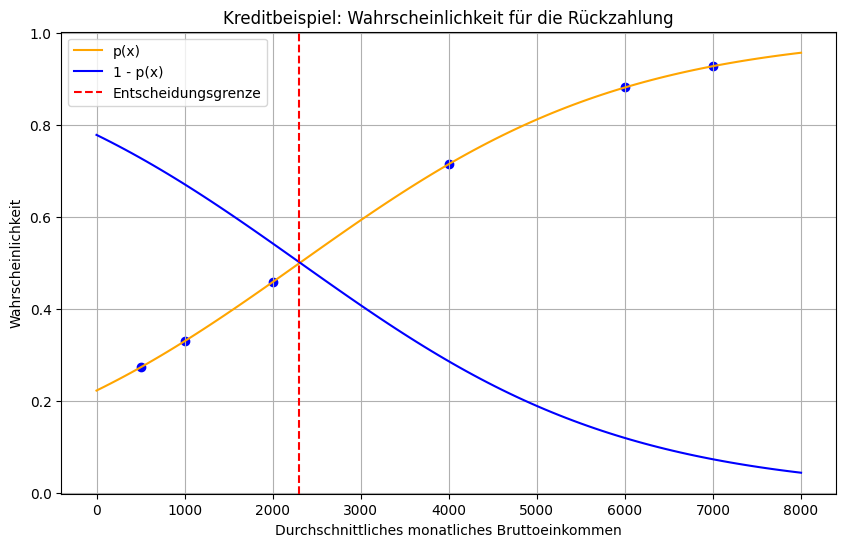

In [2]:


# Define the parameters from the example
w0 = -1.25238942
w1 = 0.000542

# Generate a range of x values (monthly gross income)
x = np.linspace(0, 8000, 100)

# Define the logistic regression function
def logistic_function(x, w0, w1):
    return 1 / (1 + np.exp(-(w0 + w1 * x)))

# Calculate the probabilities
p_x = logistic_function(x, w0, w1)
one_minus_p_x = 1 - p_x

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, p_x, label='p(x)', color='orange')
plt.plot(x, one_minus_p_x, label='1 - p(x)', color='blue')

# Plot additional points for the dataset example (if any given in the image)
# Assuming some hypothetical points for demonstration
sample_points_x = np.array([500, 1000, 2000, 4000, 6000, 7000])
sample_points_y = logistic_function(sample_points_x, w0, w1)
plt.scatter(sample_points_x, sample_points_y, color='blue')

# Adding the decision boundary at 2300 EUR
decision_boundary = 2300
plt.axvline(x=decision_boundary, color='red', linestyle='--', label='Entscheidungsgrenze')

# Adding labels and title
plt.xlabel('Durchschnittliches monatliches Bruttoeinkommen')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Kreditbeispiel: Wahrscheinlichkeit für die Rückzahlung')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## 4.3 Mehrdimensionale Logistische Regression


Natürlich lässt sich das Prinzip der logistischen Regression auch im Falle mehrdimensionaler Eingaben $ x \in \mathbb{R}^d $ verwenden. Hier wird das Modell (mit $ x_0 = 1 $) beschrieben durch

$$
p(x) = \frac{e^{w^T x}}{1 + e^{w^T x}}
$$

und der Gradient der negativen logarithmierten Likelihood ergibt sich aus

$$
\frac{\partial}{\partial w_j} (- \log L(w)) = - \sum_{\{i \mid y^{(i)} = 1\}} (1 - p(x^{(i)})) x_j^{(i)} + \sum_{\{i \mid y^{(i)} = 0\}} p(x^{(i)}) x_j^{(i)}
$$

## 4.4 Nichtlineare Logistische Regression

Mit Hilfe einer Basiserweiterung $ \phi : \mathbb{R}^d \rightarrow \mathbb{R}^{d'} $ und der mehrdimensionalen logistischen Regression können auch nichtlineare Klassifikatoren gelernt werden.



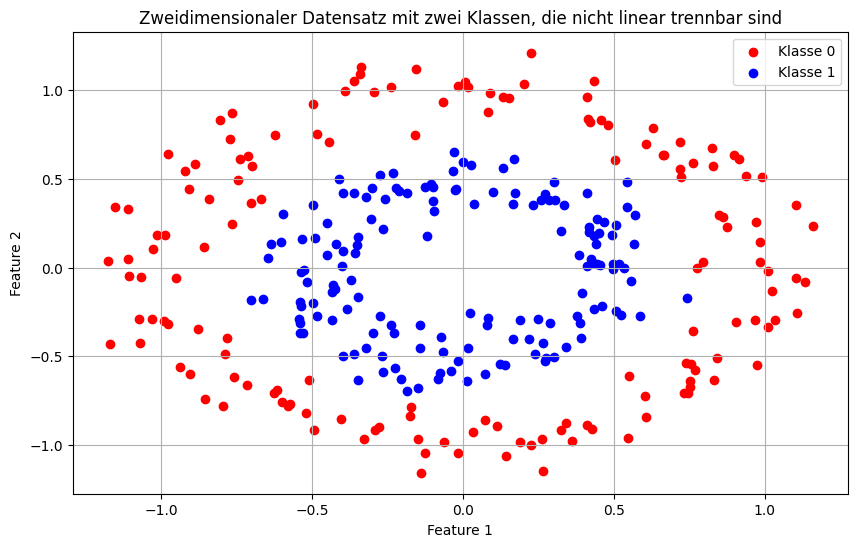

In [3]:

from sklearn.datasets import make_circles

# Erzeugen eines zweidimensionalen Datensatzes mit zwei Klassen, die nicht linear trennbar sind
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=0)

# Plotten des Datensatzes
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Klasse 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Klasse 1')

# Hinzufügen von Labels und Titel
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Zweidimensionaler Datensatz mit zwei Klassen, die nicht linear trennbar sind')
plt.legend()

# Anzeigen des Plots
plt.grid(True)
plt.show()



Mit Hilfe der Basiserweiterung $ \phi(x) = (x_1^2, x_2^2) $ kann ein logistisches Regressionsmodell gelernt werden, welches die beiden Klassen trennt.


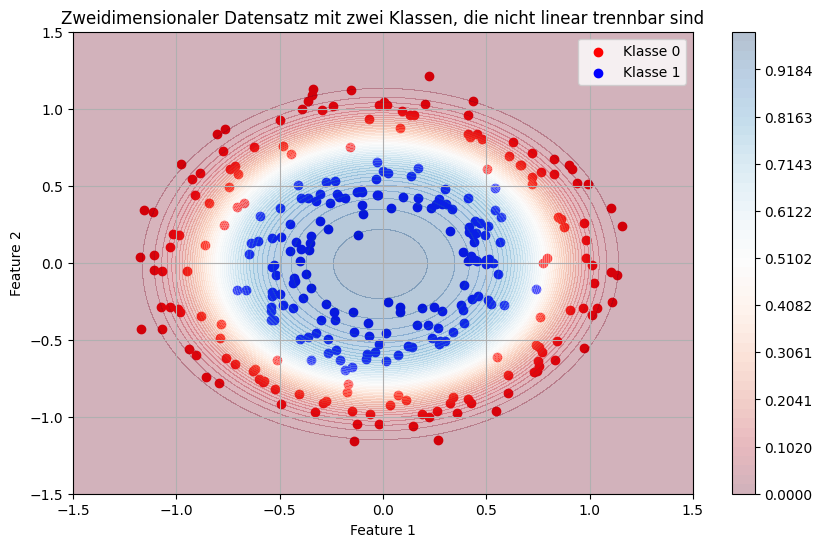

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Erzeugen eines zweidimensionalen Datensatzes mit zwei Klassen, die nicht linear trennbar sind
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=0)

# Erstellen des Modells mit einer Basiserweiterung
model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
model.fit(X, y)

# Erstellen eines Gitters für die Vorhersagen
x0, x1 = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(X_new)[:, 1].reshape(x0.shape)

# Plotten des Datensatzes und der Entscheidungsgrenze
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Klasse 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Klasse 1')
plt.contourf(x0, x1, y_proba, alpha=0.3, levels=np.linspace(0, 1, 50), cmap='RdBu')
plt.colorbar()

# Hinzufügen von Labels und Titel
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Zweidimensionaler Datensatz mit zwei Klassen, die nicht linear trennbar sind')
plt.legend()

# Anzeigen des Plots
plt.grid(True)
plt.show()

## 4.5 Leistungsmetriken
Bei der binären Klassifikation können aus Kombination von Wahrheit und Vorhersage vier Fälle auftreten.

Bei der binären Klassifikation können aus Kombination von Wahrheit und Vorhersage vier Fälle auftreten.

|            | prediction (+)         | prediction (-)         |
|------------|-------------------------|-------------------------|
| truth (+)  | true positive (tp) ✅    | false negative (fn) ❌  |
| truth (-)  | false positive (fp) ❌   | true negative (tn) ✅   |


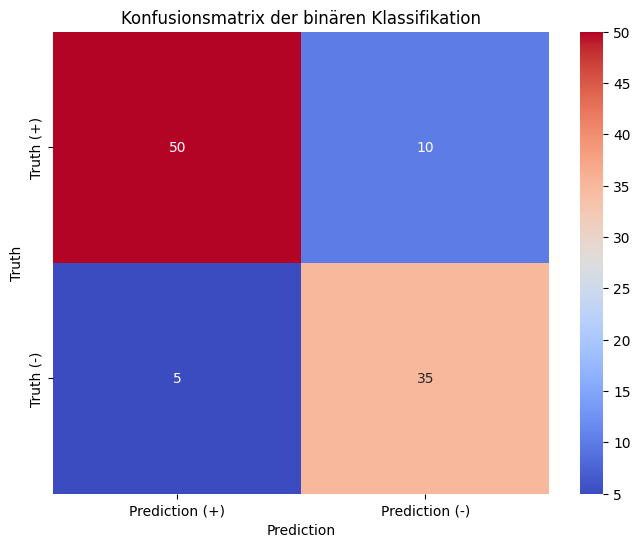

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daten für die Konfusionsmatrix
data = np.array([
    [50, 10],  # True Positive, False Negative
    [5, 35]    # False Positive, True Negative
])

# Erstellen eines Heatmap-Plots für die Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt="d", cmap="coolwarm", xticklabels=['Prediction (+)', 'Prediction (-)'], yticklabels=['Truth (+)', 'Truth (-)'])
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Konfusionsmatrix der binären Klassifikation')

# Anzeigen des Plots
plt.show()

Zählt man die Auftrittshäufigkeit der jeweiligen Fälle bei Anwendung des Klassifikators (üblicherweise) auf den Testdatensatz, so lassen sich Aussagen über die Güte des Modells treffen.
### Genauigkeit
Die häufigste Leistungsmetrik, die verwendet wird, ist die **Genauigkeit** definiert als

$$
\text{Genauigkeit} = \frac{\text{tp} + \text{tn}}{\text{tp} + \text{tn} + \text{fp} + \text{fn}}
$$

Die Genauigkeit (accuracy) ist der Anteil der korrekt klassifizierten Daten am Gesamtdatensatz. Meist wird daher versucht, die Genauigkeit zu maximieren.
### Fehlerrate
Die Fehlerrate ist das intuitive Gegenteil der Genauigkeit und somit definiert als

$$
\text{Fehlerrate} = \frac{\text{fp} + \text{fn}}{\text{tp} + \text{tn} + \text{fp} + \text{fn}} = 1 - \text{Genauigkeit}
$$

Meist ist man daran interessiert, die Fehlerrate zu minimieren.
### Präzision
Die **Präzision** (precision) ist der Anteil der korrekt positiv vorhergesagten Datensätze an der Gesamtheit der als positiv vorhergesagten Datensätze und definiert als

$$
\text{Präzision} = \frac{\text{tp}}{\text{tp} + \text{fp}}
$$
### Trefferquote
Die **Trefferquote** (recall) ist der Anteil der korrekt positiv vorhergesagten Datensätze an der Gesamtheit der echt positiven Datensätze und definiert als

$$
\text{Trefferquote} = \frac{\text{tp}}{\text{tp} + \text{fn}}
$$

Beide Metriken werden üblicherweise maximiert, wobei meist ein Kompromiss getroffen werden muss.

Es kommt auf die Anwendung an, welche Leistungsmetrik verwendet werden sollte:

▶ **Medizinische Tests**: Angenommen positiv ist gleich bedeutend mit krank, wie in “HIV positiv”, dann sollte ein Test einen hohen Recall haben.

▶ **Spam-Erkennung**: Angenommen positiv bedeutet gewollte E-Mail, dann sollte ein Spam-Erkenner eine hohe Precision haben.